<a href="https://colab.research.google.com/github/gusper01/TP1FIUBA/blob/master/Copia_de_Copia_de_TP1_primer_analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**Organización de Datos**

## <Center>**Trabajo Práctico 1** Real or Not? NLP with Disaster Tweets

**Objetivo:**  
El objetivo del primer TP es realizar un análisis exploratorio del set de datos. Queremos ver quécosas podemos descubrir sobre los datos que puedan resultar interesantes. Estas cosaspueden estar relacionadas al objetivo del TP2 (predecir si un cierto tweet es real o no) o no,ambas son de interés.

**A tener en cuenta:**

1.Calidad del análisis exploratorio: qué tipo de preguntas se hacen y de qué forma seresponden, ¿es la respuesta clara y concisa con respecto a la pregunta formulada?  
2. ¿Presenta el grupo un listado de "insights" aprendidos sobre los datos en base alanálisis realizado? ¿Es interesante?


In [1]:
# Importación general de librerías y de visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#! git clone https://github.com/gusper01/TP1FIUBA

In [2]:
# Importación del set de datos
#! ls  
train_raw = pd.read_csv('./train.csv')
pd.options.display.max_colwidth = 150
train_raw.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1


#### Características del set de datos

In [3]:
train_raw.shape

(7613, 5)

In [4]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
train_raw['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [6]:
train_raw.loc[:, 'keyword'].isna().value_counts(normalize = True)

False    0.991987
True     0.008013
Name: keyword, dtype: float64

In [7]:
train_raw.loc[train_raw['target'] == 1, 'keyword'].isna().value_counts(normalize = True)

False    0.98716
True     0.01284
Name: keyword, dtype: float64

In [8]:
train_raw.loc[:, 'location'].isna().value_counts(normalize = True)

False    0.66728
True     0.33272
Name: location, dtype: float64

In [9]:
train_raw.loc[train_raw['target'] == 0, 'location'].isna().value_counts(normalize = True)

False    0.66421
True     0.33579
Name: location, dtype: float64

In [10]:
train_raw.loc[train_raw['target'] == 1, 'location'].isna().value_counts(normalize = True)

False    0.671354
True     0.328646
Name: location, dtype: float64

#### Limpieza del set de datos

In [11]:
train = train_raw.dropna(subset = ['keyword'])
train.head()

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N,0


#### Análisis cantidad de palabras

In [12]:
train_words_qy = train.merge(train['text'].map(lambda x: len(x.split())), on = train['id'], how = 'inner')
train_words_qy.drop(columns = ['key_0'], inplace = True)
train_words_qy.rename(columns = {'text_x':'text', 'text_y':'words_qy'}, inplace = True)
train_words_qy.head()

,id,keyword,location,text,target,words_qy
0,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C,1,5
1,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw,0,10
2,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi,1,9
3,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,7
4,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N,0,13


In [13]:
train_words_qy.groupby('target')['words_qy'].agg(['mean', 'max', 'min'])

,mean,max,min
target,,,
0,14.750867,31,1
1,15.174048,30,2


In [14]:
def f(lista):
    serie = pd.Series(lista)
    serie_filtrada = serie.str.findall(r'^[a-zA-Z0-9]*$')
    return ' '.join(serie_filtrada.str.join('').tolist())
    
train_text_clean = (train['text'].map(lambda x: x.split())).map(lambda x: f(x))
train_text_clean.head(10)

31                                                                       Wholesale Markets ablaze 
32                                                                  We always try to bring the    
33                                                                  Breaking  flag set ablaze in  
34                                                                   Crying out for  Set me ablaze
35                                          On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE 
36       built so much hype around new acquisitions but I doubt they will set the EPL ablaze this 
37                                                                INEC Office in Abia Set Ablaze  
38                  Barbados  JAMAICA  Two cars set  SANTA CRUZ  Head of the St Elizabeth Police  
39                                                                            Ablaze for you Lord 
40                                                                               Check these      
Name: text

In [15]:
train_clean_text = train.merge(train_text_clean, on = train.index, how = 'inner').drop(columns = 'key_0')
train_clean_text.rename(columns = {'text_x':'text', 'text_y':'clean_text'}, inplace = True)
train_clean_text.head()

,id,keyword,location,text,target,clean_text
0,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C,1,Wholesale Markets ablaze
1,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw,0,We always try to bring the
2,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi,1,Breaking flag set ablaze in
3,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,Crying out for Set me ablaze
4,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N,0,On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE


In [16]:
train_clean_text_words_qy = train_clean_text.merge(train_clean_text['clean_text']\
                                                   .map(lambda x: len(x.split())), on = train_clean_text['id'], how = 'inner')
train_clean_text_words_qy.drop(columns = ['key_0'], inplace = True)
train_clean_text_words_qy.rename(columns = {'clean_text_x':'clean_text', 'clean_text_y':'words_qy'}, inplace = True)
train_clean_text_words_qy.head()

,id,keyword,location,text,target,clean_text,words_qy
0,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C,1,Wholesale Markets ablaze,3
1,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw,0,We always try to bring the,6
2,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi,1,Breaking flag set ablaze in,5
3,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,Crying out for Set me ablaze,6
4,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N,0,On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE,12


In [17]:
train_clean_text_words_qy.groupby('target')['words_qy'].agg(['mean', 'max', 'min'])

,mean,max,min
target,,,
0,11.469119,30,0
1,11.666770,28,0


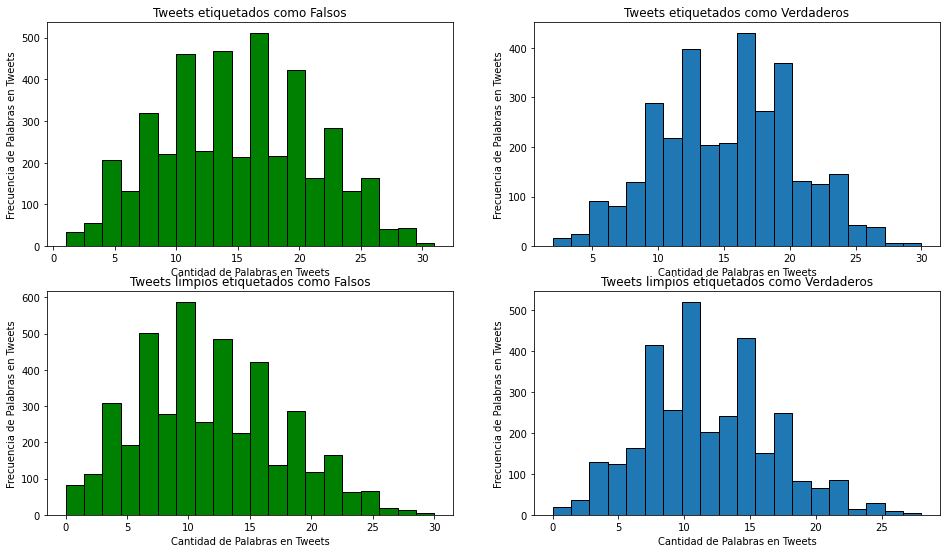

In [18]:
fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(nrows = 2, ncols = 2, figsize = (16,8))

ax1.hist(train_words_qy.groupby('target').get_group(0)['words_qy'], bins = 20, facecolor='g', edgecolor = 'black')
ax1.set_title('Tweets etiquetados como Falsos')
ax1.set_xlabel('Cantidad de Palabras en Tweets')
ax1.set_ylabel('Frecuencia de Palabras en Tweets')

ax2.hist(train_words_qy.groupby('target').get_group(1)['words_qy'], bins = 20, edgecolor = 'black')
ax2.set_title('Tweets etiquetados como Verdaderos')
ax2.set_xlabel('Cantidad de Palabras en Tweets')
ax2.set_ylabel('Frecuencia de Palabras en Tweets')

ax3.hist(train_clean_text_words_qy.groupby('target').get_group(0)['words_qy'], bins = 20, facecolor='g', edgecolor = 'black')
ax3.set_title('Tweets limpios etiquetados como Falsos')
ax3.set_xlabel('Cantidad de Palabras en Tweets')
ax3.set_ylabel('Frecuencia de Palabras en Tweets')

ax4.hist(train_clean_text_words_qy.groupby('target').get_group(1)['words_qy'], bins = 20, edgecolor = 'black')
ax4.set_title('Tweets limpios etiquetados como Verdaderos')
ax4.set_xlabel('Cantidad de Palabras en Tweets')
ax4.set_ylabel('Frecuencia de Palabras en Tweets')

plt.subplots_adjust(bottom = 0.025)
#plt.savefig('hist_cleaned_text.png')
plt.show()

In [19]:
# Voy a darle a los datos la forma que necesito para hacer el violin plot con dos 
# categóricos: el target y si el texto fue o no limpiado

train_words_qy['kind'] = 'original_tweet'
train_clean_text_words_qy = train_clean_text_words_qy[['id', 'keyword', 'location', 'text', 'target', 'words_qy']]
train_clean_text_words_qy['kind'] = 'cleaned_text'
data_violin_plot = train_words_qy.append(train_clean_text_words_qy, ignore_index = True).sort_values('id')
data_violin_plot['target'].replace({0:'Tweets Falsos', 1:'Tweets Verdaderos'}, inplace = True)
data_violin_plot.head()

,id,keyword,location,text,target,words_qy,kind
0,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C,Tweets Verdaderos,5,original_tweet
7552,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C,Tweets Verdaderos,3,cleaned_text
1,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw,Tweets Falsos,10,original_tweet
7553,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw,Tweets Falsos,6,cleaned_text
2,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi,Tweets Verdaderos,9,original_tweet


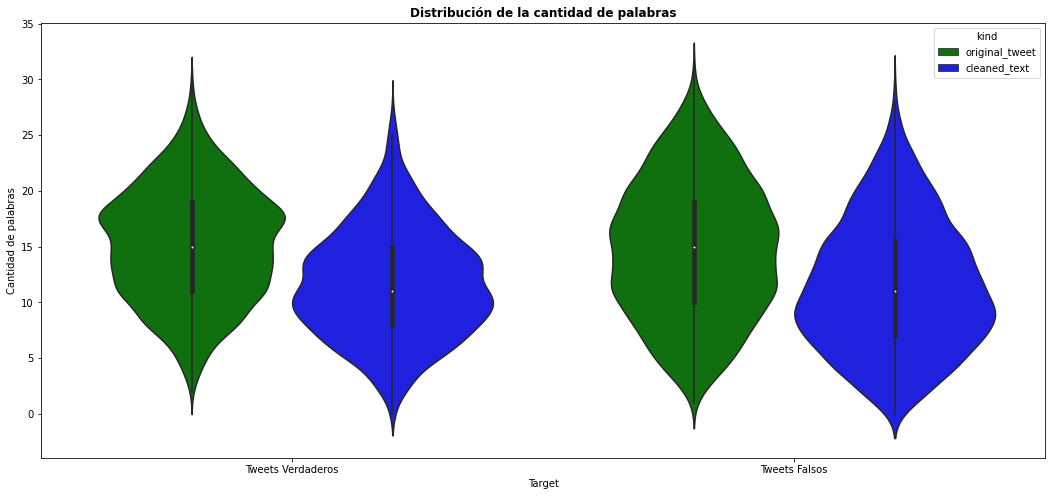

In [20]:
# Violin plot
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 8))
ax = sns.violinplot(x="target", y="words_qy", hue="kind", data=data_violin_plot, palette=['g', 'b'])

ax.set_ylabel('Cantidad de palabras')
ax.set_xlabel('Target')
plt.title('Distribución de la cantidad de palabras', fontweight = 'semibold')
#plt.savefig('violin_cleaned_text.png')
plt.show()

#### Análisis de las keywords

In [21]:
# Agrupo para contar la recurrencia de cada keyword
train_grouped = train.groupby(['target', 'keyword'])['id'].count().to_frame()
train_grouped.max()

id    40
dtype: int64

In [22]:
# Siendo 40 la máxima recurrencia de una keyword, tomo 15 como el valor mínimo necesario (?)
train_grouped_15 = train_grouped[train_grouped['id'] > 15]

# Modifico el formato dejando los target como atributo
train_grouped_unstacked = train_grouped_15.unstack(0)
train_grouped_unstacked.head()

# Me quedo con aquellas keyword que comparten target
train_grouped_unstacked = train_grouped_unstacked.dropna()

# Doy formato al nombre de las columnas
train_grouped_unstacked.columns = ['target: 0', 'target: 1']
train_grouped_unstacked.head()

,target: 0,target: 1
keyword,,
ambulance,18.0,20.0
bombed,19.0,19.0
burning%20buildings,16.0,21.0
collided,17.0,23.0
damage,22.0,19.0


In [23]:
# Le doy caracter porcentual a los atributos para la posterior visualización
train_grouped_unstacked['target%: 0'] = train_grouped_unstacked['target: 0']/(train_grouped_unstacked['target: 0'] + train_grouped_unstacked['target: 1'])
train_grouped_unstacked['target%: 1'] = train_grouped_unstacked['target: 1']/(train_grouped_unstacked['target: 0'] + train_grouped_unstacked['target: 1'])
train_grouped_unstacked.head()

,target: 0,target: 1,target%: 0,target%: 1
keyword,,,,
ambulance,18.0,20.0,0.473684,0.526316
bombed,19.0,19.0,0.500000,0.500000
burning%20buildings,16.0,21.0,0.432432,0.567568
collided,17.0,23.0,0.425000,0.575000
damage,22.0,19.0,0.536585,0.463415


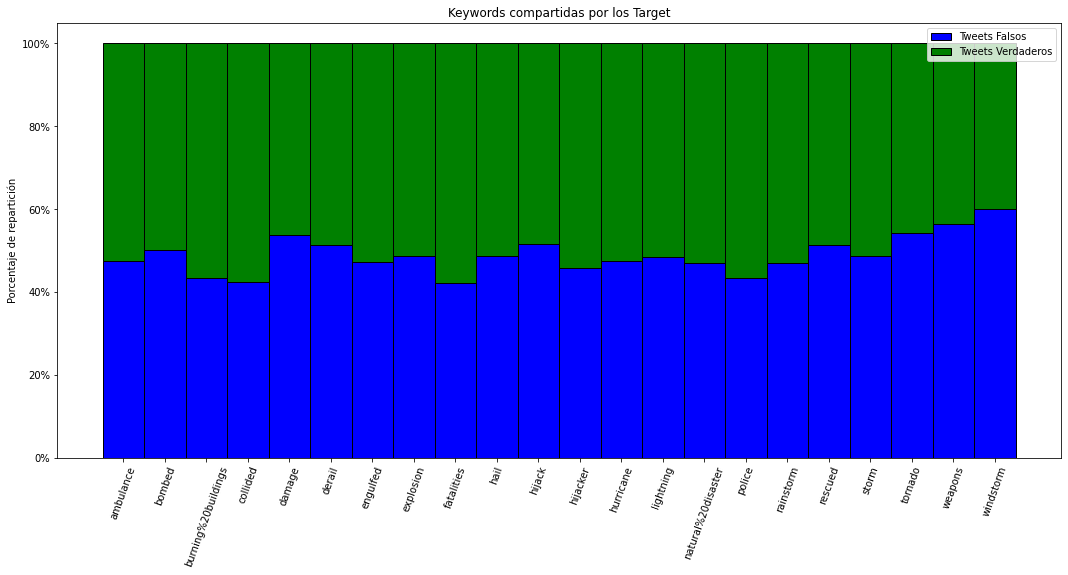

In [24]:
# Creo una visualización rápida en la que, para cada palabra, se muestra el aporte de cada uno de los target para llegar al
# 100% de la recurrencia
fig, ax = plt.subplots(figsize = (18,8))

ax.bar(train_grouped_unstacked.index, train_grouped_unstacked['target%: 0'], label = 'Tweets Falsos', 
       width = 1, color = 'b', edgecolor = 'black')
ax.bar(train_grouped_unstacked.index, train_grouped_unstacked['target%: 1'], label = 'Tweets Verdaderos', 
       bottom = train_grouped_unstacked['target%: 0'], width = 1, color = 'g', edgecolor = 'black')

plt.xticks(train_grouped_unstacked.index, rotation= 70)
porcen = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in porcen])
ax.set_ylabel('Porcentaje de repartición')
ax.set_title("Keywords compartidas por los Target")
ax.legend(['Tweets Falsos', 'Tweets Verdaderos'])
#plt.savefig('keywords_compartidas.png')
plt.show()

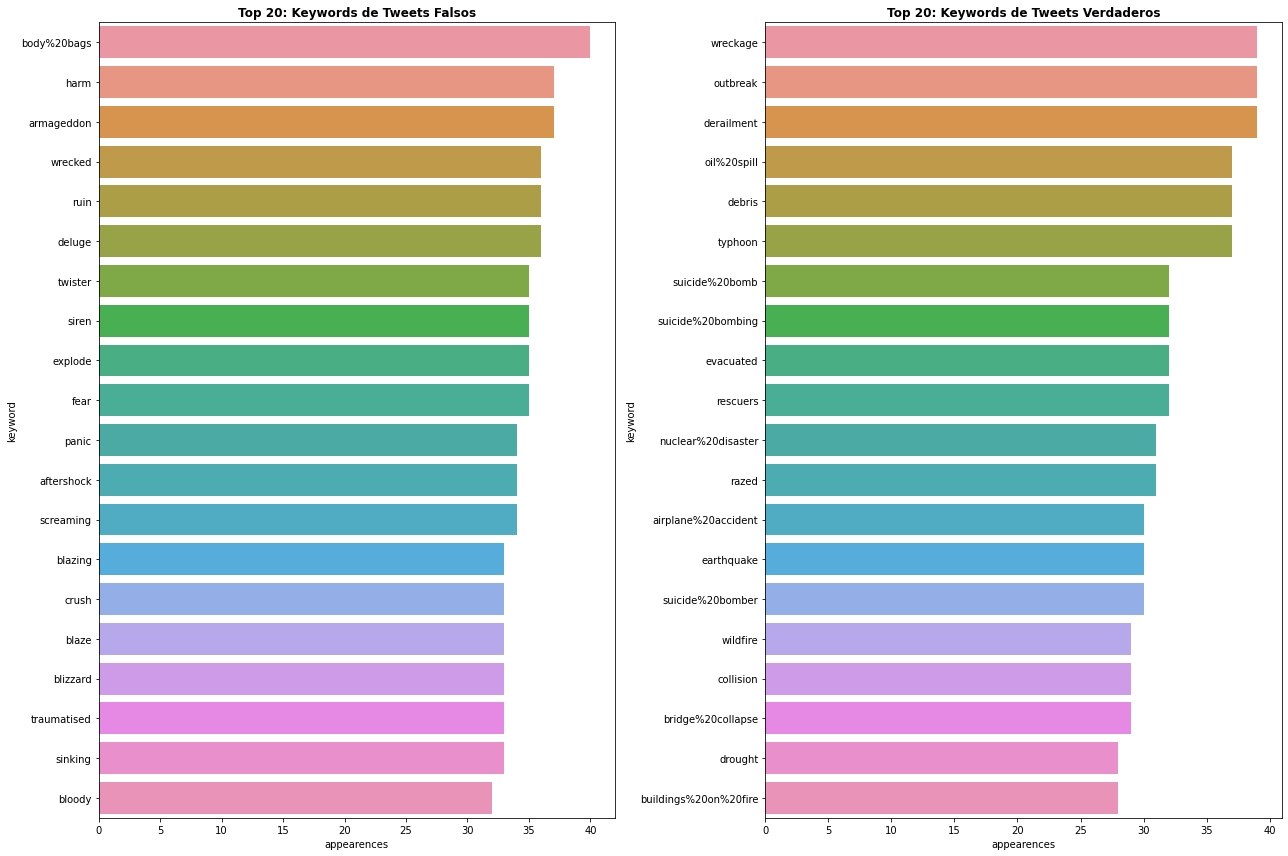

In [25]:
# Top 25 de palabras que sólo aparecen para target = 0
train_keyword_0 = train.loc[train['target'] == 0, 'keyword'].value_counts()
train_keyword_0_top25 = train_keyword_0.nlargest(20).to_frame().reset_index().rename(columns = {'index':'keyword', 'keyword':'appearences'})

# Top 25 de palabras que sólo aparecen para target = 1
train_keyword_1 = train.loc[train['target'] == 1, 'keyword'].value_counts()
train_keyword_1_top25 = train_keyword_1.nlargest(20).to_frame().reset_index().rename(columns = {'index':'keyword', 'keyword':'appearences'})

# Bar plot
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (18,12))
sns.barplot(x= 'appearences', y = 'keyword', data = train_keyword_0_top25, orient = 'h', ax = ax1)
ax1.set_title('Top 20: Keywords de Tweets Falsos', fontweight = 'semibold')
sns.barplot(x= 'appearences', y = 'keyword', data = train_keyword_1_top25, orient = 'h', ax = ax2)
ax2.set_title('Top 20: Keywords de Tweets Verdaderos', fontweight = 'semibold')
plt.tight_layout()
plt.savefig('top20_keywords_no_compartidas.png')
#plt.show()


In [26]:
# Cómo se ven los tweets verdaderos de alguna de esas keywords?
train.loc[(train['target'] == 1) & (train['keyword'] == 'derailment')]

,id,keyword,location,text,target
2439,3503,derailment,Mumbai (India),Madhya Pradesh Train Derailment: Village Youth Saved Many Lives,1
2440,3504,derailment,"Chicago, IL",Service on the Green Line has resumed after an earlier derailment near Garfield with residual delays.,1
2441,3505,derailment,India,Madhya Pradesh Train Derailment: Village Youth Saved Many Lives,1
2442,3506,derailment,NaN,Death on Railway track: Why rains cannot take all the blame?: Derailment is not very common. Last year less th... http://t.co/jdkQC12tid,1
2443,3508,derailment,NaN,#news Madhya Pradesh Train Derailment: Village Youth Saved Many Lives http://t.co/fcTrAWJcYL #til_now #NDTV,1
2444,3509,derailment,Mumbai,MP trains derailment: Û÷ItÛªs the freakiest of freak accidentsÛª: \n\nMP trains derailment: Û÷ItÛªs the freakiest of ... http://t.co/uHXODSc7Wi,1
2445,3510,derailment,Coimbatore,#TeamFollowBack Madhya Pradesh Train Derailment: Village Youth Saved Many Lives #FollowBack,1
2446,3512,derailment,NaN,#ModiMinistry Madhya Pradesh Train Derailment: Village Youth Saved Many Lives http://t.co/YvMpHd0z9X,1
2447,3513,derailment,"Chicago, IL 60607",Still and Box alarm for the train derailment at 61st and Calumet struck out on the orders of 2-1-21. #ChicagoScanner,1
2448,3514,derailment,"Palo Alto, California",Consent Order on cleanup underway at CSX derailment site - Knoxville News Sentinel http://t.co/GieSoMgWTR http://t.co/NMFsgKf1Za,1


Notar los cuasi duplicados!

#### Análisis de caracerísticas propias de los tweets:
##### (RT, hashtags, quotations, links, mentions, emojis, etc)

In [27]:
# RT
rt_porcentual = train.loc[train['text'].str.contains(r'(#)?RT\s') == True, 'target'].value_counts(normalize = True)*100
rt_porcentual

/home/martin/.local/lib/python3.6/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


0    51.578947
1    48.421053
Name: target, dtype: float64

In [28]:
# Hashtags
hashtags_porcentual = train.loc[train['text'].str.contains(r'#[a-zA-z0-9]*') == True, 'target']\
.value_counts(normalize = True)*100
hashtags_porcentual

0    50.862069
1    49.137931
Name: target, dtype: float64

In [29]:
hashtags_raw_0 = train.loc[train['target'] == 0, 'text'].str.findall(r'#\S*').tolist() #Resultado: lista de listas
hashtags_0 = []
for hashtag in hashtags_raw_0:
    if hashtag != []:
        hashtag = list(set(hashtag)) #Elimino duplicados (caso hashtag repetido en un tweet)
        for value in hashtag:
            hashtags_0.append(value)

hashtags_raw_1 = train.loc[train['target'] == 1, 'text'].str.findall(r'#\S*').tolist()
hashtags_1 = []
for hashtag in hashtags_raw_1:
    if hashtag != []:
        hashtag = list(set(hashtag)) #Elimino duplicados
        for value in hashtag:
            hashtags_1.append(value)

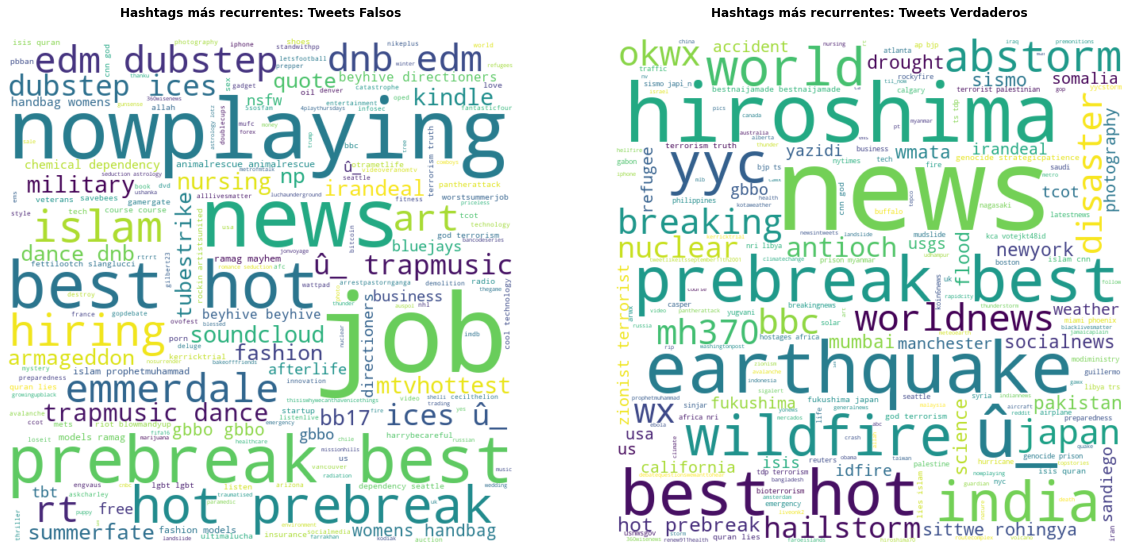

In [30]:
# WORDCLOUD

# Importo librería necesaria
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

# Tomo los datos de la celda anterior: hashtags_0 y hashtags_1

# Creo figura y la lleno con las palabras de esas listas
maskArray = np.array(Image.open("tweeter_logo_black.png"))
cloud_0 = WordCloud(background_color = "white", mask = maskArray).generate(' '.join(hashtags_0).lower())
cloud_1 = WordCloud(background_color = "white", mask = maskArray).generate(' '.join(hashtags_1).lower()) 

# Plot
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,20))
ax1.imshow(cloud_0, interpolation='bilinear')
ax1.set_axis_off()
ax1.set_title('Hashtags más recurrentes: Tweets Falsos\n', fontweight = 'semibold')
ax2.imshow(cloud_1, interpolation='bilinear')
ax2.set_axis_off()
ax2.set_title('Hashtags más recurrentes: Tweets Verdaderos\n', fontweight = 'semibold')
plt.savefig('hashtags_wordcloud.png')
plt.show()


In [31]:
pd.Series(hashtags_0).value_counts().head(10)

#hot           17
#best          17
#prebreak      17
#news          15
#GBBO          13
#nowplaying    10
#jobs           9
#Beyhive        8
#DnB            8
#NowPlaying     8
dtype: int64

In [32]:
pd.Series(hashtags_1).value_counts().head(10)

#News         32
#news         21
#Hiroshima    20
#??           13
#prebreak     13
#best         13
#hot          13
#India        10
#Japan        10
#???           9
dtype: int64

In [33]:
# Cómo se ven los tweets verdaderos de alguno de estos hashtags?
train.loc[(train['target'] == 1) & (train['text'].str.contains(r'#Hiroshima'))].head(10)

,id,keyword,location,text,target
1077,1556,bomb,Ireland,The crew on #EnolaGay had nuclear bomb on board disarmed. 15 mins to #Hiroshima they got ready to arm Little Boy http://t.co/JB25fHKe6q,1
1107,1600,bombed,??,'the third generation atomic bombed survivor' Photo exhibition 11:00 to 18:00 8/6. \n#?? #Hiroshima http://t.co/gVAipmLSl0,1
1137,1638,bombing,NaN,The only country claiming the moral high ground is the only one to have dropped atomic bombs. #Hiroshima #BanTheBomb\nhttp://t.co/6G49ywwsQJ,1
1140,1644,bombing,WorldWide,#Australia #News ; #Japan marks 70th anniversary of #Hiroshima atomic bombing http://t.co/7aD0L7cgee READ MORE; http://t.co/hHzQl9tzNP,1
1152,1660,bombing,"Washington, DC",#Japan marks 70th anniversary of #Hiroshima atomic bombing (from @AP) http://t.co/qREInWg0GS,1
2341,3368,demolition,NaN,No civilian population ever deserves demolition may we never forget &amp; learn from our mistakes #Hiroshima,1
2601,3735,destroyed,"Boise, Idaho",70 years after #ABomb destroyd #HiroshimaÛÓ#BBC looks at wht #survived http://t.co/dLgNUuuUYn #CNV Watch Peace Vigils: http://t.co/jvkYzNDtja,1
2703,3877,detonation,NaN,Don't miss Chris #Appy's detonation of the myths obscuring our crime in #Hiroshima 70 yrs ago this month. @salon http://t.co/DlP8kPkt2k,1
2754,3957,devastation,"Newport, Wales, UK",@cllrraymogford Indeed Ray devastation would be far more comprehensive #Hiroshima,1
2772,3984,devastation,EVERYWHERE,What would your city look like if it had been the subject of the #Hiroshima bombing? Hint-devastation. #BeyondtheBomb http://t.co/3nKcUlGVMW,1


Notar que el bombardeo a Hiroshima fue una catástrofe pero de otra época!

In [34]:
# Otro ejemplo: Ahora para ese caracter tan particular que aparece en el ranking
train.loc[(train['target'] == 1) & (train['text'].str.contains(r'#\?'))]

,id,keyword,location,text,target
875,1269,blood,???,Private thirsty night?SAD BLOOD ROCK'N ROLL? #??,1
1107,1600,bombed,??,'the third generation atomic bombed survivor' Photo exhibition 11:00 to 18:00 8/6. \n#?? #Hiroshima http://t.co/gVAipmLSl0,1
1323,1914,burning,Australian Capital Territory,#?x?: :and to counter acts such as the burning of the Alexandrian library.,1
2165,3106,debris,NaN,#?? #?? #??? #??? MH370: Aircraft debris found on La Reunion is from missing Malaysia Airlines ... http://t.co/MRVXBZywd4,1
2168,3109,debris,NaN,#?? #?? #??? #??? MH370: Aircraft debris found on La Reunion is from missing Malaysia Airlines ... http://t.co/q1GlK8plUD,1
2170,3112,debris,NaN,#?? #???? #??? #??? MH370: Aircraft debris found on La Reunion is from missing Malaysia Airlines ... http://t.co/hHWv0EUDFv,1
2175,3118,debris,NaN,#?? #???? #??? #??? MH370: Aircraft debris found on La Reunion is from missing Malaysia Airlines ... http://t.co/oTsM38XMas,1
2182,3126,debris,NaN,#??? #?? #??? #??? MH370: Aircraft debris found on La Reunion is from missing Malaysia Airlines ... http://t.co/zxCORQ0A3a,1
2461,3529,derailment,NaN,#???? #?? #??? #??? Trains derailment: 'It's the freakiest of freak accidents' - The Indian Express http://t.co/4Y4YtwhD74,1
4886,6956,massacre,NaN,Massacre at #Sinjar : Has the World Forgotten the #Yazidi ?\nhttp://t.co/WUh1g2BLP1\n#??_????_????? #yazidi_shingal_genocide #EzidiGenocide,1


In [35]:
# Mentions
mentions_porcentual = train.loc[train['text'].str.contains(r'\s@.*') == True, 'target'].value_counts(normalize = True)*100
mentions_porcentual

0    63.793103
1    36.206897
Name: target, dtype: float64

In [36]:
# webpages
webpages_porcentual = train.loc[train['text'].str.contains(r'https://[a-zA-Z0-9].[a-z]([./a-zA-Z0-9])?') == True, 'target']\
.value_counts(normalize = True)*100
webpages_porcentual

/home/martin/.local/lib/python3.6/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


0    66.995074
1    33.004926
Name: target, dtype: float64

In [37]:
#emojis: la carita feliz, por ejemplo
train.loc[(train['text'].str.contains(r':(-)?\)') == True), 'target'].value_counts(normalize = True)

0    0.916667
1    0.083333
Name: target, dtype: float64

In [38]:
# Qué dicen los tweets de catástrofes que incluyen la carita feliz?
train.loc[(train['text'].str.contains(r':(-)?\)') == True) & train['target'] == 1]

,id,keyword,location,text,target
819,1190,blizzard,Sydney,@Ashayo @MsMiggi Hi Ashayo! I believe there will be VODs on YouTube after the presentation but there is nothing like seeing it live :),1
2457,3525,derailment,UK,@Raishimi33 :) well I think that sounds like a fine plan where little derailment is possible so I applaud you :),1


In [39]:
#lol
train.loc[train['text'].str.contains(r'(lol)|(LOL)|(LoL)') == True, 'target'].value_counts()

/home/martin/.local/lib/python3.6/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


0    63
1     8
Name: target, dtype: int64

In [40]:
# Qué dicen los tweets de catástrofes que incluyen la palabra lol?
train.loc[(train['text'].str.contains(r'(lol)|(LOL)|(LoL)') == True) & (train['target'] == 1)].head(10)

,id,keyword,location,text,target
2128,3056,deaths,"Mooseknuckle, Maine",ÛÏ@LOLGOP: 2.2 cases of voter fraud a year. \nWE NEED NEW LAWS!\n\n83 gun deaths a day. \nWHO ACTUALLY FOLLOWS LAWS AMIRITE?\n\n#VRA50Û,1
2152,3089,deaths,"the void, U.S.A",@HighQualityBird a reverse situation (lol I don't know 9/11?) where US civilian deaths were specifically utilized to make a political,1
5052,7201,natural%20disaster,Canada,@Cali74142290 lol natural disaster/hospital crisis something is needed to get rid of some cast members....,1
6047,8643,sinkhole,NaN,MRW when a sinkhole opens up beneath my friends and I... #gif #funny #lol #comedy #iFunny #video #image #RT http://t.co/XiYdYfptru,1
6701,9598,thunder,Baydestrian,suddenly it's off &amp; on gloomy &amp; thunder so loud it shakes the windows? Not ever on the Bay Area. Miss me w/that lol http://t.co/x4eCGGvnSN,1
6798,9738,tragedy,houston,@itss_selenaluna like a beautiful ass tragedy lol,1
6913,9912,trouble,YA MOTHA BED,@lucysforsale funny cause my dumb ass was the young one to get n trouble the most lol,1
7050,10101,typhoon,The Peach State,I think a Typhoon just passed through here lol,1


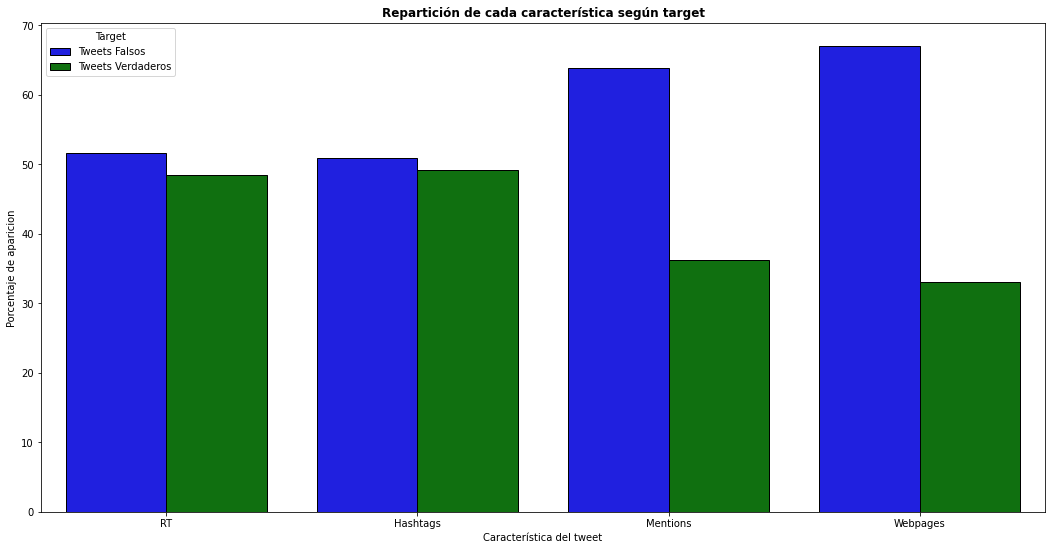

In [41]:
# Boxplot para resumir

# Preparación de los datos
rt_porcentual_df = rt_porcentual.to_frame().reset_index().rename(columns = {'index':'Target', 'target':'Porcentaje de aparicion'})
rt_porcentual_df['kind'] = 'RT'
tweet_caract = rt_porcentual_df
hashtags_porcentual_df = hashtags_porcentual.to_frame().reset_index().rename(columns = {'index':'Target', 'target':'Porcentaje de aparicion'})
hashtags_porcentual_df['kind'] = 'Hashtags'
tweet_caract = tweet_caract.append(hashtags_porcentual_df, ignore_index = True)
mentions_porcentual_df = mentions_porcentual.to_frame().reset_index().rename(columns = {'index':'Target', 'target':'Porcentaje de aparicion'})
mentions_porcentual_df['kind'] = 'Mentions'
tweet_caract = tweet_caract.append(mentions_porcentual_df, ignore_index = True)
webpages_porcentual_df = webpages_porcentual.to_frame().reset_index().rename(columns = {'index':'Target', 'target':'Porcentaje de aparicion'})
webpages_porcentual_df['kind'] = 'Webpages'
tweet_caract = tweet_caract.append(webpages_porcentual_df, ignore_index = True)
tweet_caract['Target'].replace({0:'Tweets Falsos', 1:'Tweets Verdaderos'}, inplace = True)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18,9))
sns.barplot(x = 'kind', y = 'Porcentaje de aparicion', hue = 'Target', data = tweet_caract, palette = ['b', 'g'],
            edgecolor = 'black', ax = ax)
ax.set_xlabel('Característica del tweet')
plt.title('Repartición de cada característica según target', fontweight = 'semibold')
plt.savefig('tweet_caract.png')
#plt.show()

In [42]:
tweet_caract['Target'].replace({0:'Tweets Falsos', 1:'Tweets Verdaderos'}, inplace = True)

In [43]:
tweet_caract

,Target,Porcentaje de aparicion,kind
0,Tweets Falsos,51.578947,RT
1,Tweets Verdaderos,48.421053,RT
2,Tweets Falsos,50.862069,Hashtags
3,Tweets Verdaderos,49.137931,Hashtags
4,Tweets Falsos,63.793103,Mentions
5,Tweets Verdaderos,36.206897,Mentions
6,Tweets Falsos,66.995074,Webpages
7,Tweets Verdaderos,33.004926,Webpages
